<a href="https://colab.research.google.com/github/aps0611/data_visualization/blob/main/book_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# plotly

* **plotly.express** is a high level interface for creating easy to use and expressive plots. It provides a simple API for common chart types such as scatter, line, bar and histogram. as well as some more specialized visualizations like treemaps, sunbursts and 3D plots, plotly.express is built on top of plotly.graph_objects and provides a streamlined interface that makes it easy to create complex visualizations with minimal code. 

* **plotly.graph-objects** is a low level interface that provides complete control over appearance and behaviour of plot. It allows user to specify every aspect of the plot, from the color of individual points to position of labels and annotations. plotly.graph-objects is particularly useful for creating custom visualizations that require fine-grained control over the layout and appearance of the plot. 

for more on plotly charts read here:
[https://plotly.com/python/basic-charts/]

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import urllib, json

plotly.express is easy to use high level interface to plotly which operates on a variety of type of data and produces easy to go style figures

## Basic Charts

## Scatter plots

In [2]:
df = px.data.iris()
fig = px.scatter(df, x = 'sepal_width', 
                 y = 'sepal_length', 
                 color = 'species', 
                 symbol = 'species' )
fig.show()

Altair and plotly

insert>> codesnippet >>> scatter

In [3]:
import altair as alt

alt.Chart(df).mark_point().encode(
    x = 'sepal_width',
    y = 'sepal_length',
    color = 'species'
).interactive()

alt.Chart(...)

## bar

In [5]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',
  y='Origin',
  color='Origin'
)

alt.Chart(...)

# Bubble

In [6]:
df = px.data.iris()
fig = px.scatter(df, x = 'sepal_width', y= 'sepal_length',
                 color = 'species', size = 'petal_length',
                 hover_data = ['petal_width'])
fig.show()

In [8]:
# using altair
import altair as alt

alt.Chart(df).mark_point().encode(
    x = 'sepal_width',
    y = 'sepal_length',
    color = 'species',
    size = 'petal_length'
).interactive()

alt.Chart(...)

## line charts

In [10]:
df = px.data.gapminder().query("continent=='Asia'")
fig = px.line(df, x = 'year', y = 'lifeExp', color = 'country')
fig.show()

In [11]:
df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x = 'year', y = 'lifeExp', color = 'country')
fig.show()

## Bar chart

* Simple
* Stacked 
* Grouped

In [12]:
## Simple chart

data_india = px.data.gapminder().query("country =='India'")
fig = px.bar(data_india, x = 'year', y = 'pop', title = 'Simple Bar Chart Example')
fig.show()

In [13]:
data_india

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
700,India,Asia,1972,50.651,567000000,724.032527,IND,356
701,India,Asia,1977,54.208,634000000,813.337323,IND,356
702,India,Asia,1982,56.596,708000000,855.723538,IND,356
703,India,Asia,1987,58.553,788000000,976.512676,IND,356
704,India,Asia,1992,60.223,872000000,1164.406809,IND,356
705,India,Asia,1997,61.765,959000000,1458.817442,IND,356


using matplotlib

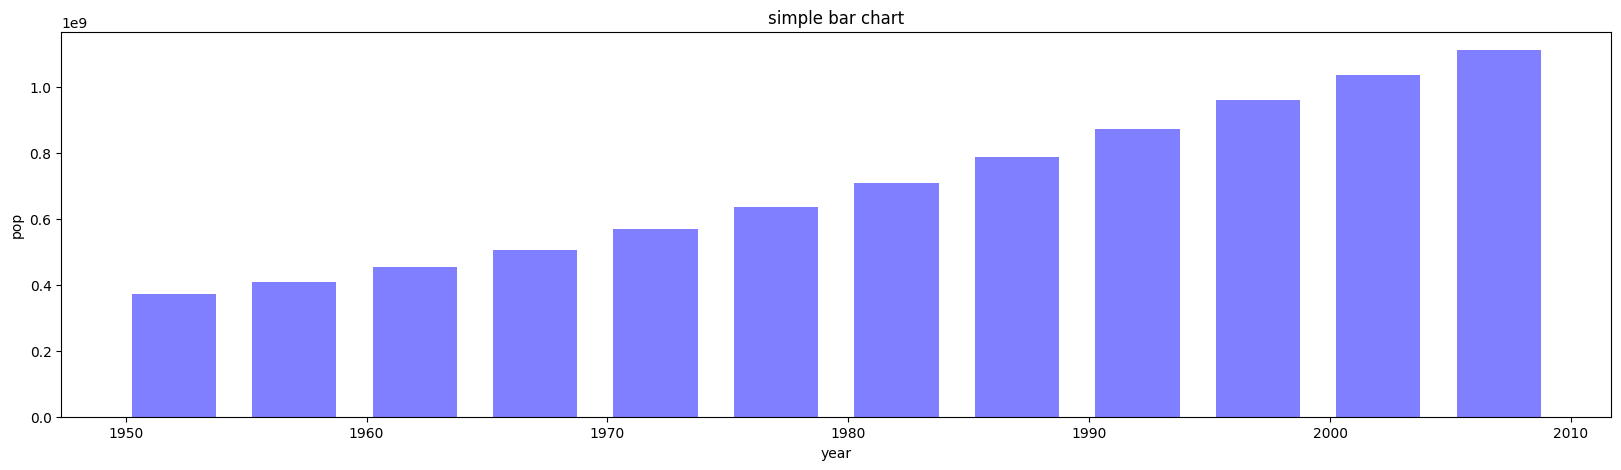

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.bar(data_india['year'], 
        height = data_india['pop'], 
        width = 3.5,
        color = 'blue',
        alpha = 0.5)
plt.xlabel('year')
plt.ylabel('pop')
plt.title('simple bar chart')
plt.show()

## Stacked

In [16]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x = 'nation', 
             y = 'count', color = 'medal',
             title = 'Medal counts  countrywise')
fig.show()

# this chart gives the medal distribution of different countries stacked together in a single graph

In [17]:
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [18]:
px.data.tips() # data on tips in an hotel

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Grouped

In [20]:
df = px.data.tips()
fig = px.bar(df, x = 'sex', 
             y = 'total_bill', 
             color = 'smoker', 
             barmode = 'group',
             height = 400)
fig.show()

## Pie chart

In [21]:
df = px.data.tips()
fig = px.pie(df, values = 'tip', names = 'day')
fig.show()

The most important thing about Visualizations is asking questions. What do you want to convey out of the graphs?